#### CDMI: Causal Discovery in Multivariate Timeseries

###### Notebook written by Wasim Ahmad <br> Computer Vision Group (CVG) <br> Friedrich Schiller University (FSU) Jena, Germany <br> Last updated on: April 19, 2024


The purpose of this notebook is to provide a simple usage example of the `CDMI` for generating causal graph for mulativariate time series. Higher-dimensional time series may require additional computational time or the availaibility of a graphical processing unit.

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Dependencies

In [75]:
import pickle
import time
import pathlib
import cdmi
import parameters
import numpy as np
import mxnet as mx
import pandas as pd
import functions as func
import dataloader as datasets
import matplotlib.pyplot as plt
from knockoffs import Knockoffs
from regimes import get_regimes
from deepcause import deepCause
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.distribution.multivariate_gaussian import MultivariateGaussianOutput


In [76]:
np.random.seed(1)
mx.random.seed(2)

##### Model Parameters

The parameters for model archicture varies from application to application depends on data dimensionality mainly

In [95]:
start_time = time.time()
print(f'Time now: {start_time}')
# Parameters
pars = parameters.get_rivernet_params()
freq = pars.get("freq")
epochs = pars.get("epochs")
win_size = pars.get("step_size")
slidingwin_size = pars.get("num_sliding_win")
training_length = pars.get("train_len")
prediction_length = pars.get("pred_len")
num_samples = pars.get("num_samples")
num_layers = pars.get("num_layers")
num_cells = pars.get("num_cells")
dropout_rate = pars.get("dropout_rate")
batch_size = pars.get("batch_size")
plot_path = pars.get("plot_path")
model_name = pars.get("model_name")

Time now: 1737738569.8818793


##### Load Dataset

In [96]:
epochs

50

##### Discover Causal Graph

trained_rivernet_0
COnfMat: 2
Training forecasting model....
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:11<00:00,  4.19it/s, epoch=50/50, avg_epoch_loss=2.87]


-------------*****-----------------------*****-------------
Causal Link: 553 --------------> 553
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.78, p-value: 0, KLD: -255.49
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -3602.08
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -841.84
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -2274.41
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 553 --------------> 1144
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.33, p-value: 0.28, KLD: 51.83
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.39, p-value: 0.13, KLD: 90.77
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.28, p-value: 0.5, KLD: 52.94
Fail to reject null hypothesis


100%|██████████| 50/50 [00:11<00:00,  4.23it/s, epoch=50/50, avg_epoch_loss=8.75]


-------------*****-----------------------*****-------------
Causal Link: 730 --------------> 730
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.33, p-value: 0, KLD: 79.51
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -492.3
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.28, p-value: 0, KLD: 212.57
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -959.18
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 730 --------------> 731
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.11, p-value: 1.0, KLD: 6.11
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.11, p-value: 1.0, KLD: 3.31
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.11, p-value: 1.0, KLD: 39.72
Fail to reject null hypothesis
Interventi

100%|██████████| 50/50 [00:08<00:00,  6.22it/s, epoch=50/50, avg_epoch_loss=1.16]


-------------*****-----------------------*****-------------
Causal Link: 175 --------------> 175
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 1.0, p-value: 0, KLD: -798.66
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -533.32
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -864.64
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -1510.6
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 175 --------------> 176
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.17, p-value: 0.97, KLD: 26.07
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.22, p-value: 0.78, KLD: 4.65
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.33, p-value: 0.28, KLD: -89.05
Fail to reject null hypothesis
Int

100%|██████████| 50/50 [00:08<00:00,  6.23it/s, epoch=50/50, avg_epoch_loss=-2.46]


-------------*****-----------------------*****-------------
Causal Link: 175 --------------> 175
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.56, p-value: 0, KLD: -48.28
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -273.91
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -337.36
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -526.21
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 175 --------------> 176
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.33, p-value: 0.28, KLD: -14.99
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 0.33, p-value: 0.28, KLD: -10.39
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.39, p-value: 0.13, KLD: 4.92
Fail to reject null hypothesis
Interven

100%|██████████| 50/50 [00:07<00:00,  6.50it/s, epoch=50/50, avg_epoch_loss=-5.45]


-------------*****-----------------------*****-------------
Causal Link: 154 --------------> 154
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.67, p-value: 0, KLD: -97.79
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -1504.06
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -181.68
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -567.73
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 154 --------------> 891
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.17, p-value: 0.97, KLD: -3.25
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.56, p-value: 0.01, KLD: -41.08
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.39, p-value: 0.13, KLD: -28.75
Fail to reject null hypothesis
Int

100%|██████████| 50/50 [00:07<00:00,  6.28it/s, epoch=50/50, avg_epoch_loss=4.42]


-------------*****-----------------------*****-------------
Causal Link: 119 --------------> 119
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.78, p-value: 0, KLD: -134.19
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -1622.84
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -416.8
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -1030.99
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 119 --------------> 175
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.28, p-value: 0.5, KLD: -12.89
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.17, p-value: 0.97, KLD: 14.19
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.28, p-value: 0.5, KLD: -3.31
Fail to reject null hypothesis
In

100%|██████████| 50/50 [00:07<00:00,  6.47it/s, epoch=50/50, avg_epoch_loss=0.455]


-------------*****-----------------------*****-------------
Causal Link: 727 --------------> 727
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.28, p-value: 0, KLD: -23.73
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -620.22
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.39, p-value: 0, KLD: -51.15
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -839.96
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 727 --------------> 729
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.11, p-value: 1.0, KLD: -0.73
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.17, p-value: 0.97, KLD: 7.98
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.22, p-value: 0.78, KLD: 13.38
Fail to reject null hypothesis
Inter

100%|██████████| 50/50 [00:07<00:00,  6.34it/s, epoch=50/50, avg_epoch_loss=7.54]


-------------*****-----------------------*****-------------
Causal Link: 730 --------------> 730
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.17, p-value: 0, KLD: -0.17
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -375.93
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.28, p-value: 0, KLD: 148.95
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -898.61
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 730 --------------> 731
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.11, p-value: 1.0, KLD: 30.8
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.17, p-value: 0.97, KLD: -10.43
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.17, p-value: 0.97, KLD: -1.64
Fail to reject null hypothesis
Inter

100%|██████████| 50/50 [00:07<00:00,  6.57it/s, epoch=50/50, avg_epoch_loss=-3.39]


-------------*****-----------------------*****-------------
Causal Link: 176 --------------> 176
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.33, p-value: 0, KLD: -117.6
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -588.16
Null hypothesis is rejected
Intervention: Mean
Test statistic: 1.0, p-value: 0, KLD: -947.4
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -1633.0
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 176 --------------> 431
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.28, p-value: 0.5, KLD: 31.55
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.22, p-value: 0.78, KLD: -20.99
Fail to reject null hypothesis
Intervention: Mean
Test statistic: 0.22, p-value: 0.78, KLD: 3.54
Fail to reject null hypothesis
Inter

100%|██████████| 50/50 [00:07<00:00,  6.35it/s, epoch=50/50, avg_epoch_loss=-1.95]


-------------*****-----------------------*****-------------
Causal Link: 51 --------------> 51
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.22, p-value: 0, KLD: 72.1
Null hypothesis is rejected
Intervention: Out-dist
Test statistic: 1.0, p-value: 0, KLD: -4417.33
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.72, p-value: 0, KLD: 765.78
Null hypothesis is rejected
Intervention: Uniform
Test statistic: 1.0, p-value: 0, KLD: -1613.27
Null hypothesis is rejected
-------------*****-----------------------*****-------------
Causal Link: 51 --------------> 166
-------------*****-----------------------*****-------------
Intervention: In-dist
Test statistic: 0.39, p-value: 0.13, KLD: -29.19
Fail to reject null hypothesis
Intervention: Out-dist
Test statistic: 0.67, p-value: 0.0, KLD: -48.96
Null hypothesis is rejected
Intervention: Mean
Test statistic: 0.44, p-value: 0.06, KLD: 56.8
Null hypothesis is rejected
Intervention

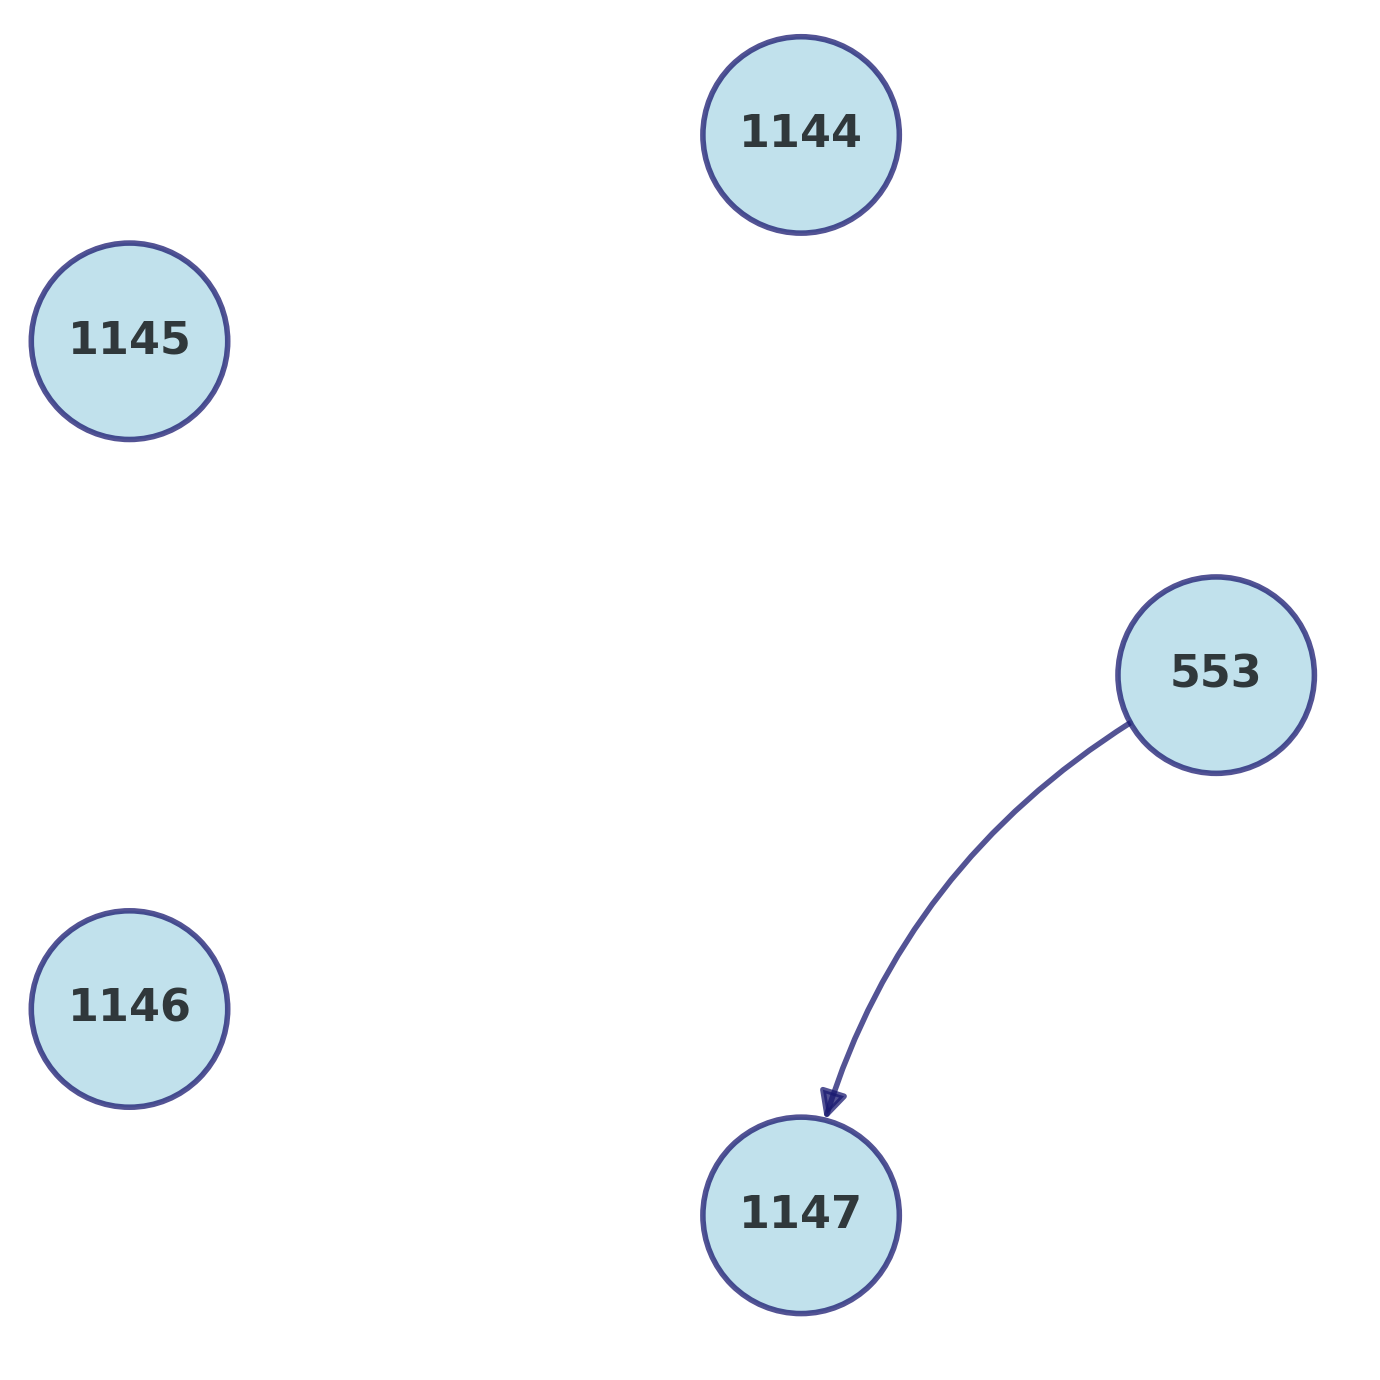

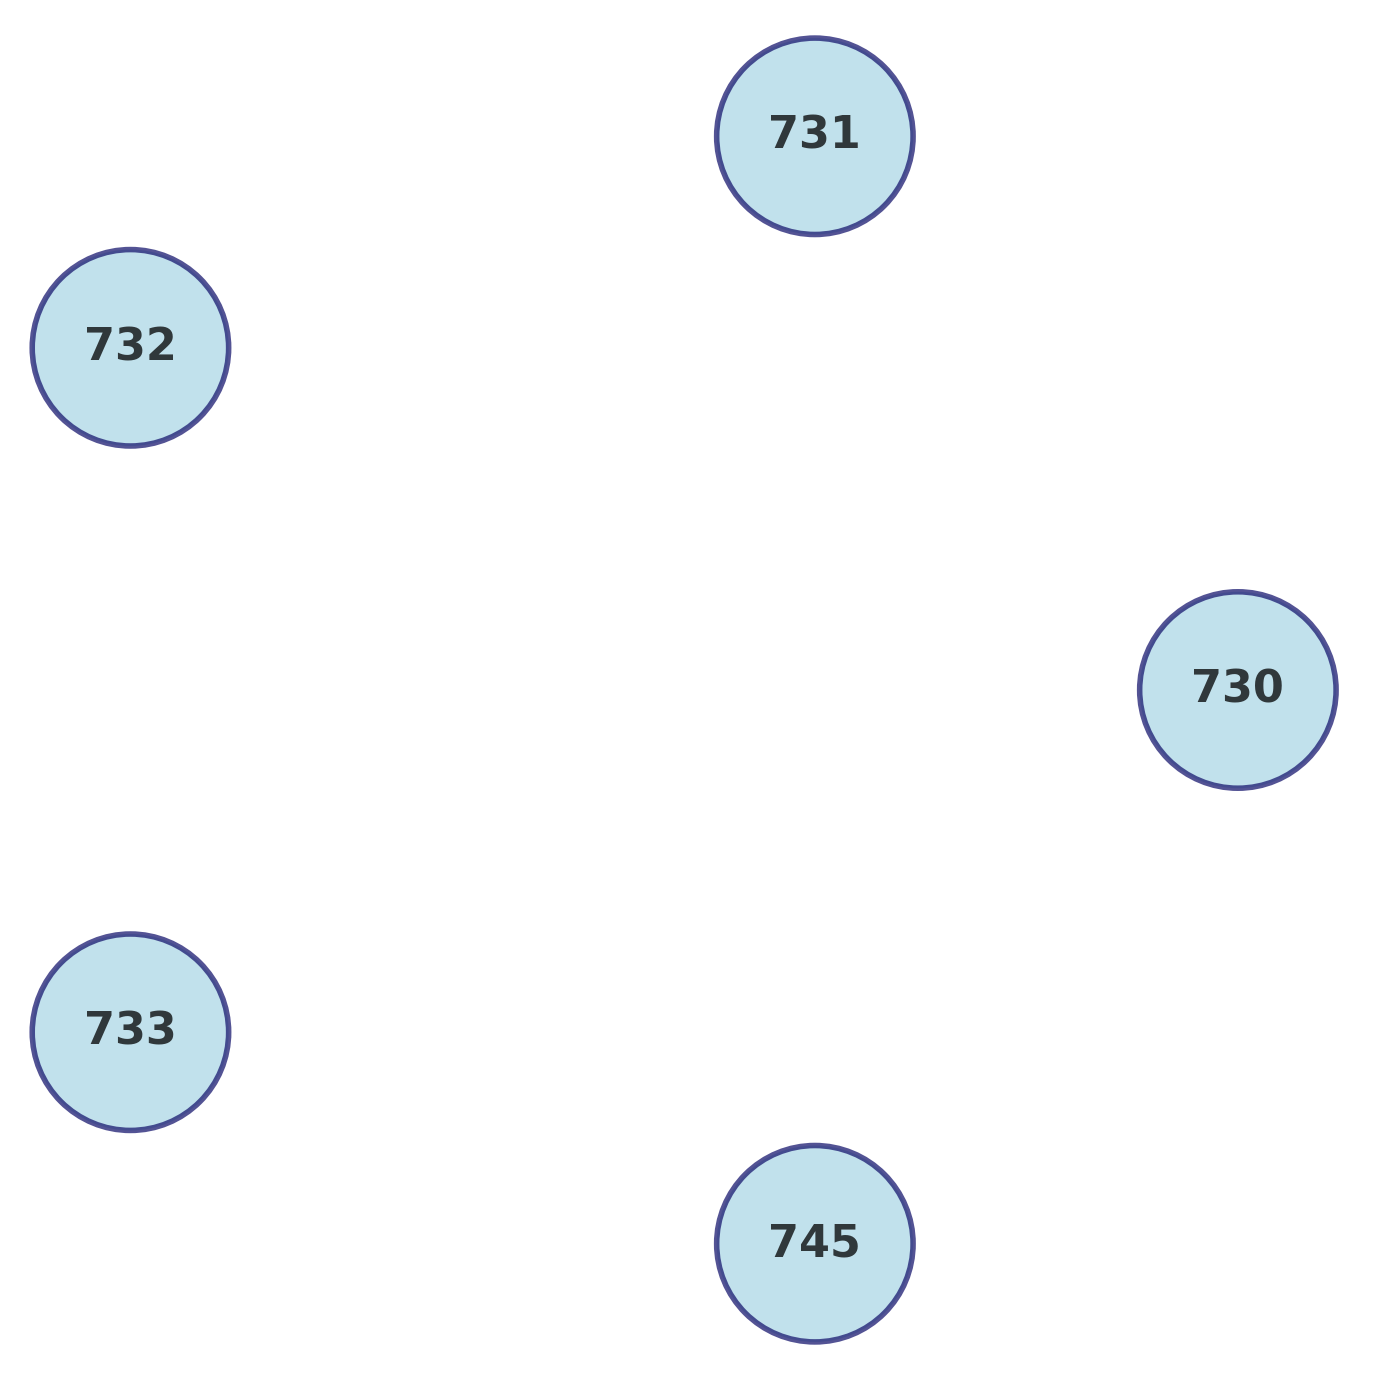

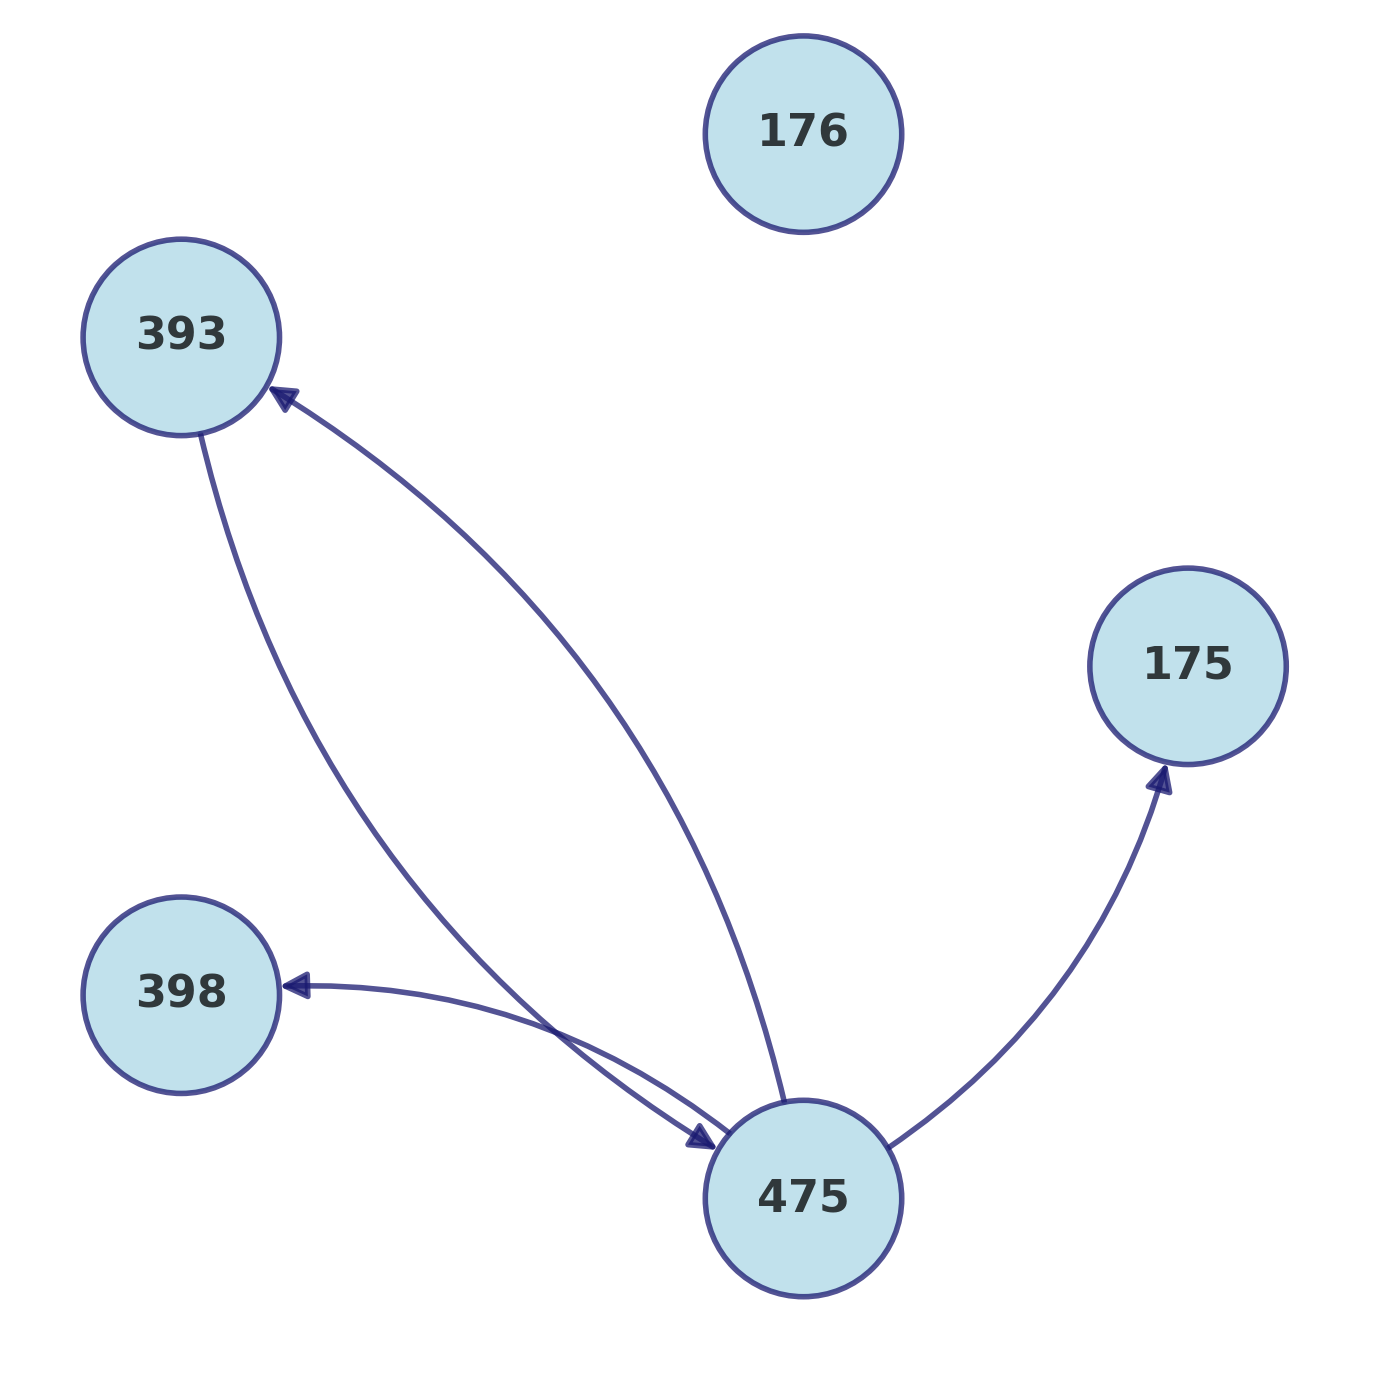

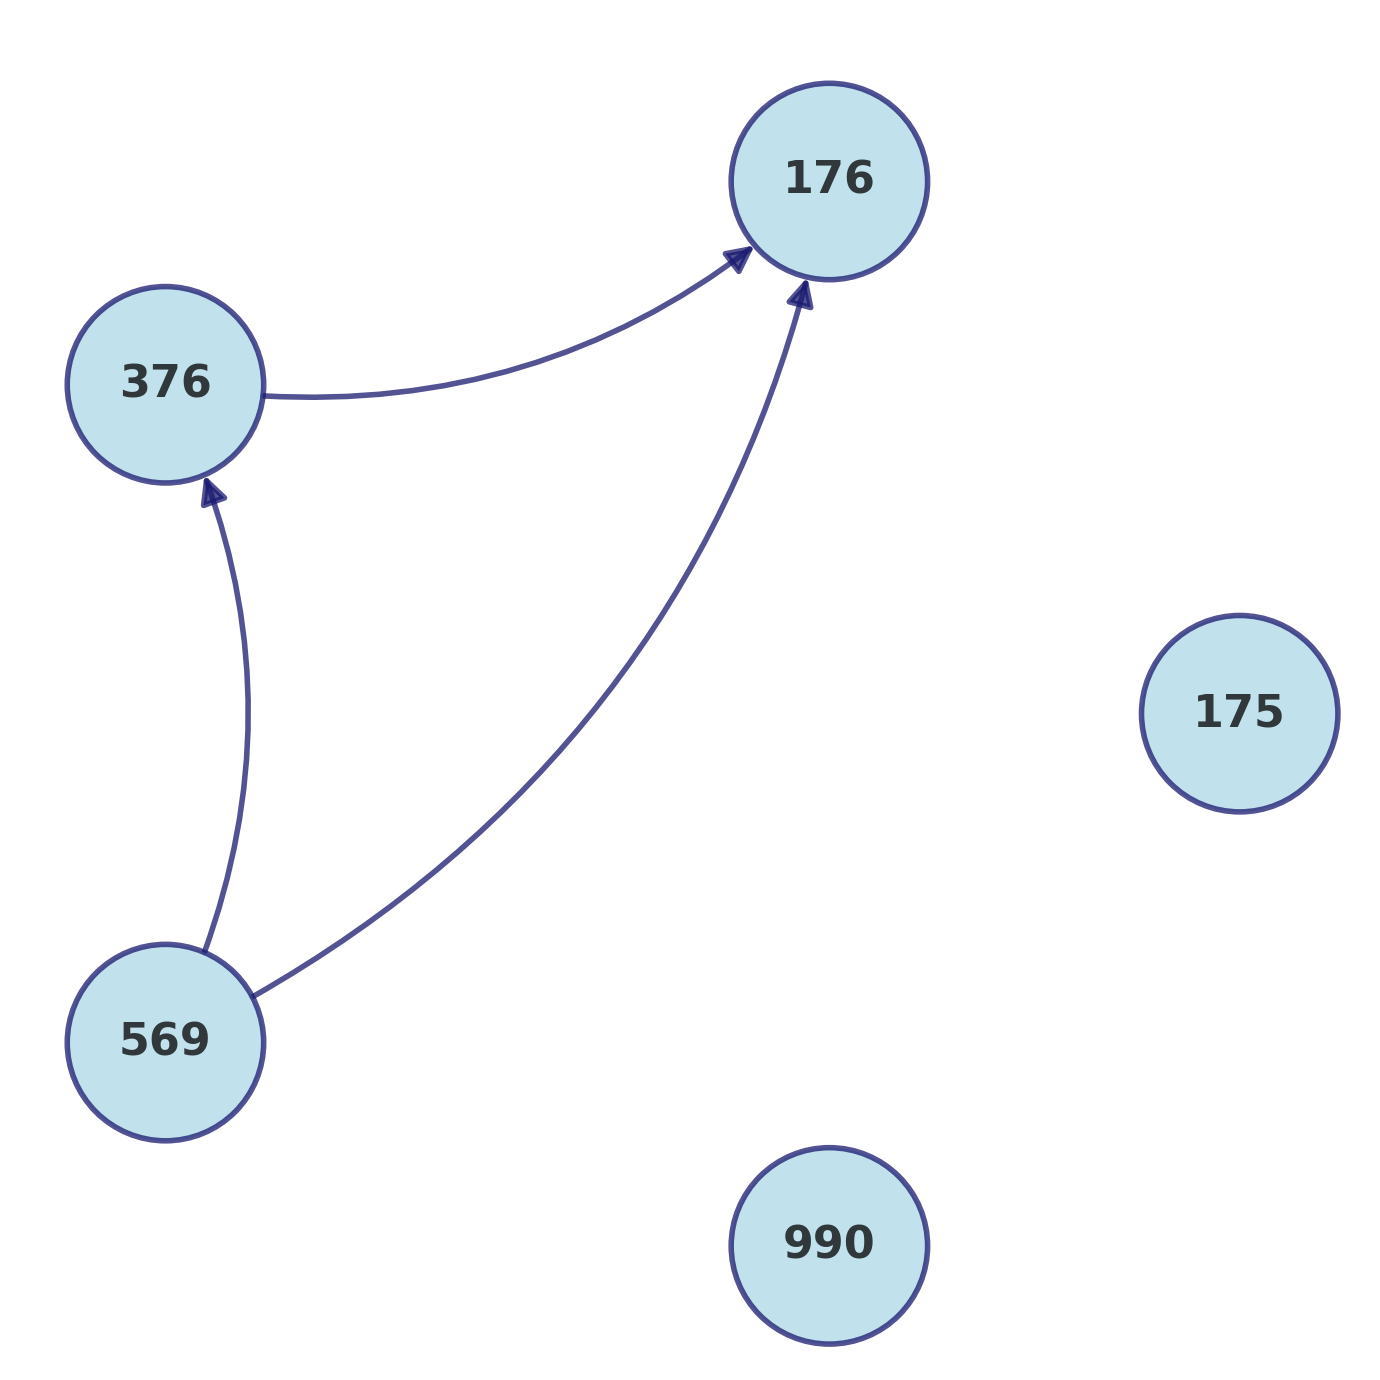

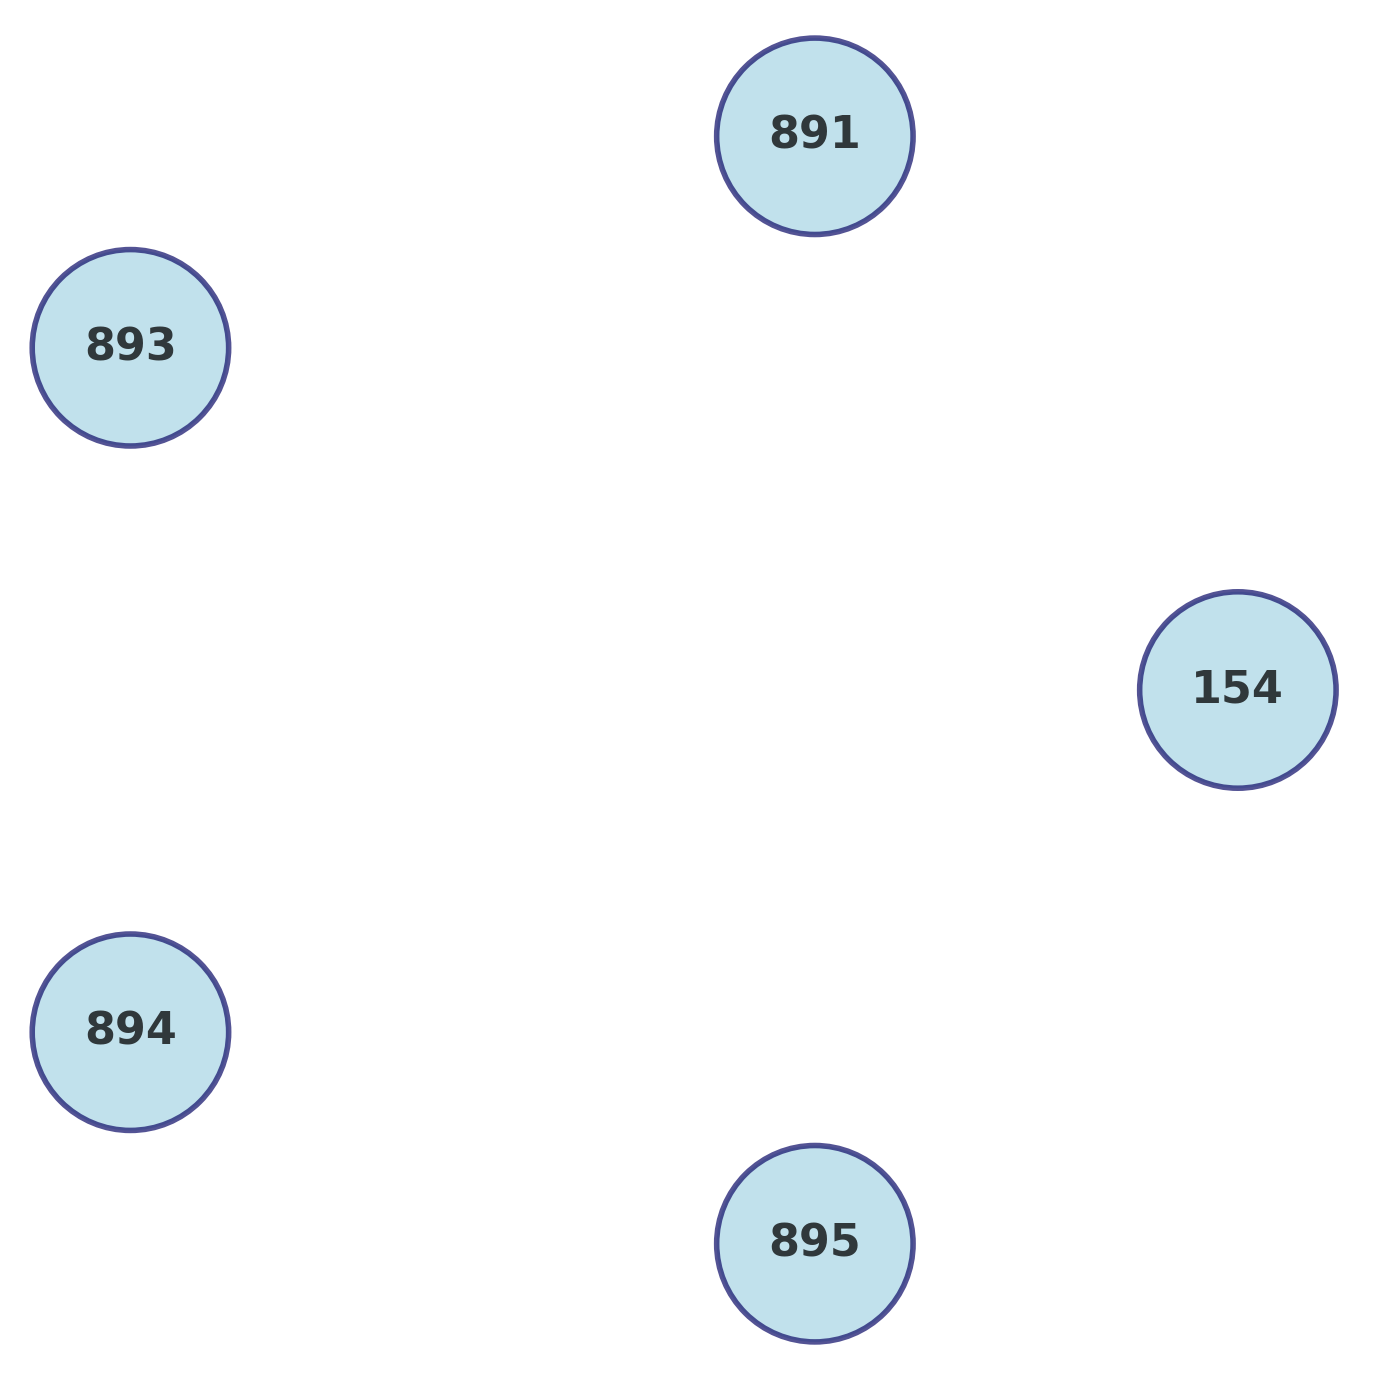

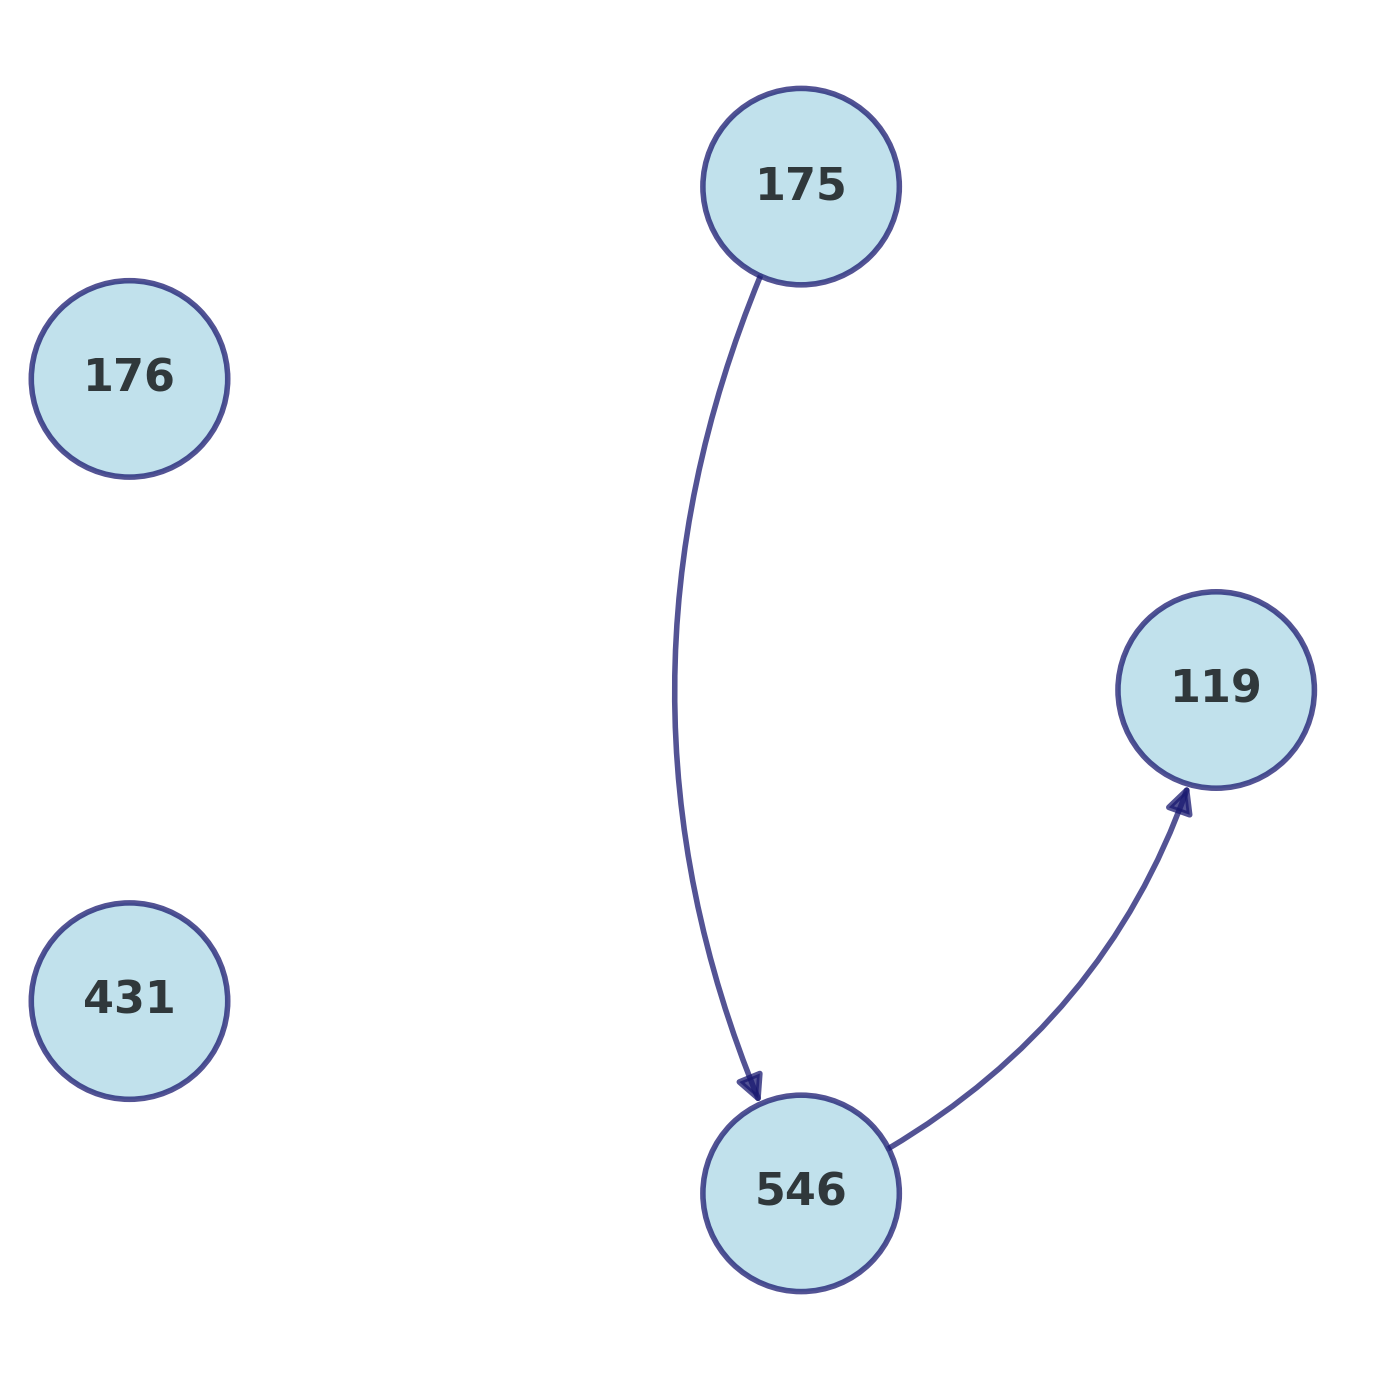

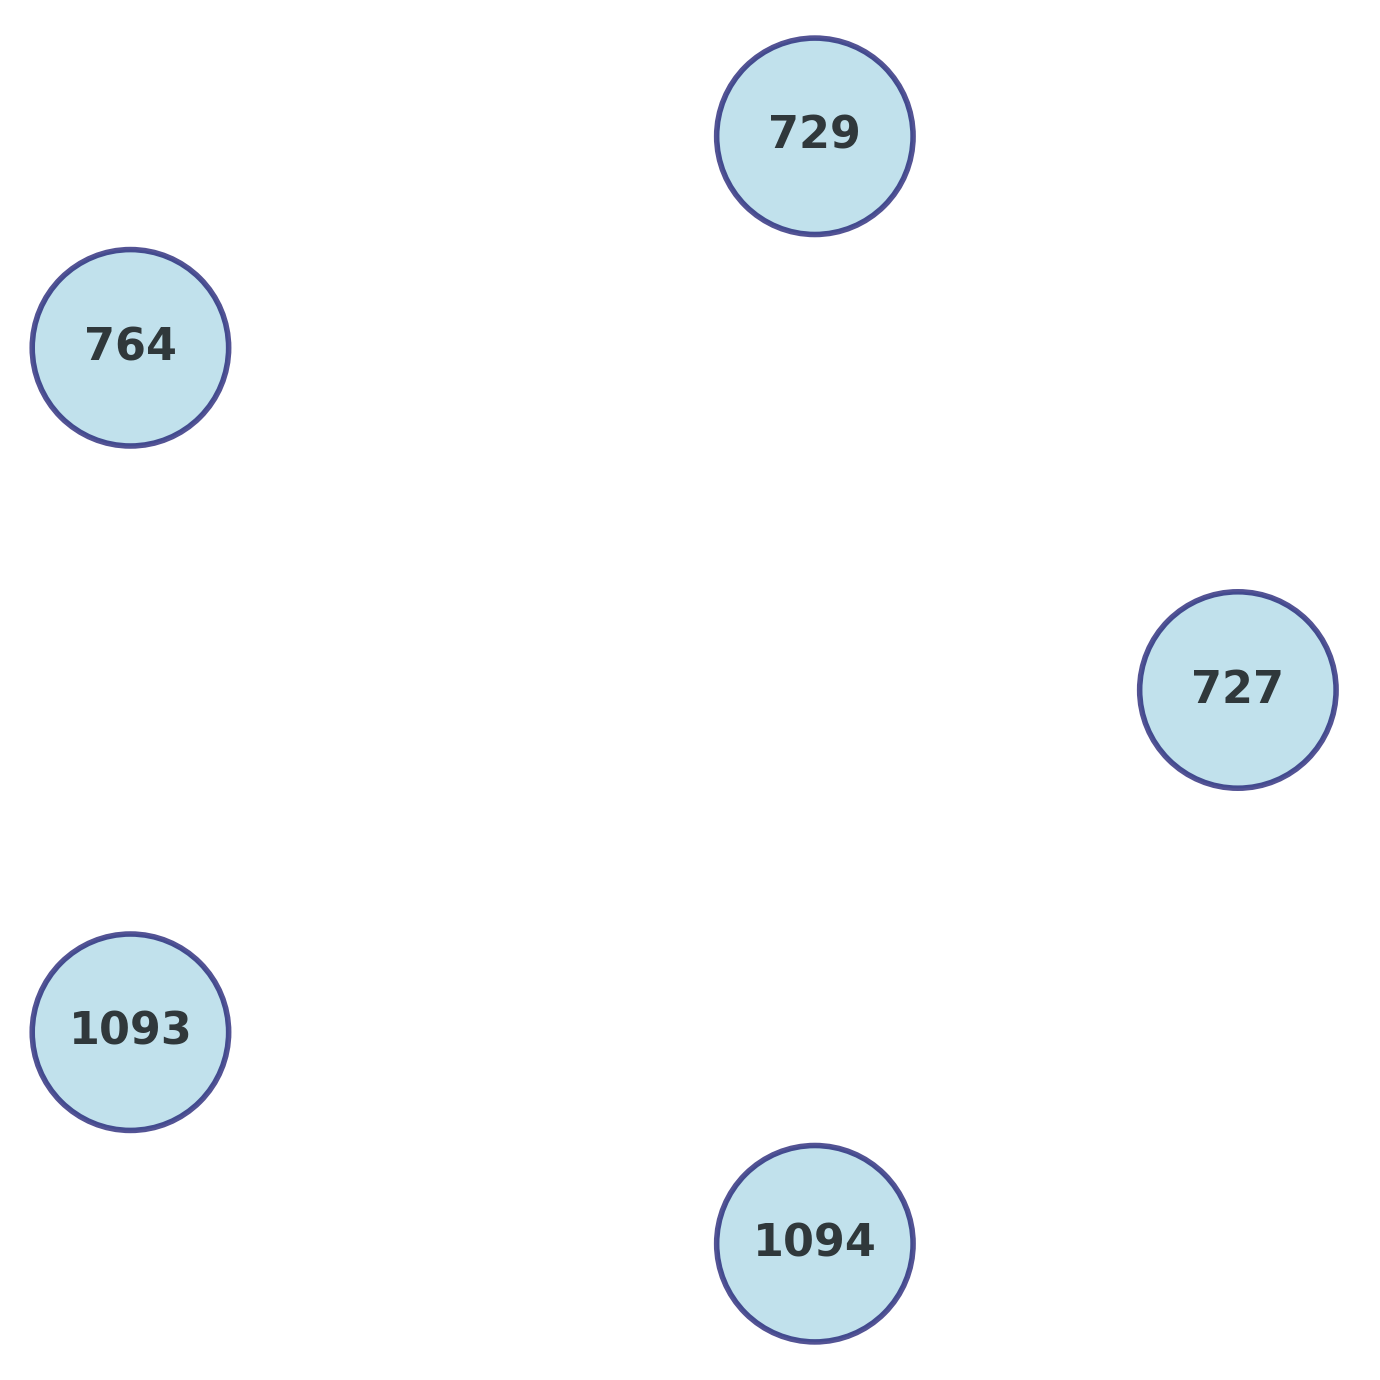

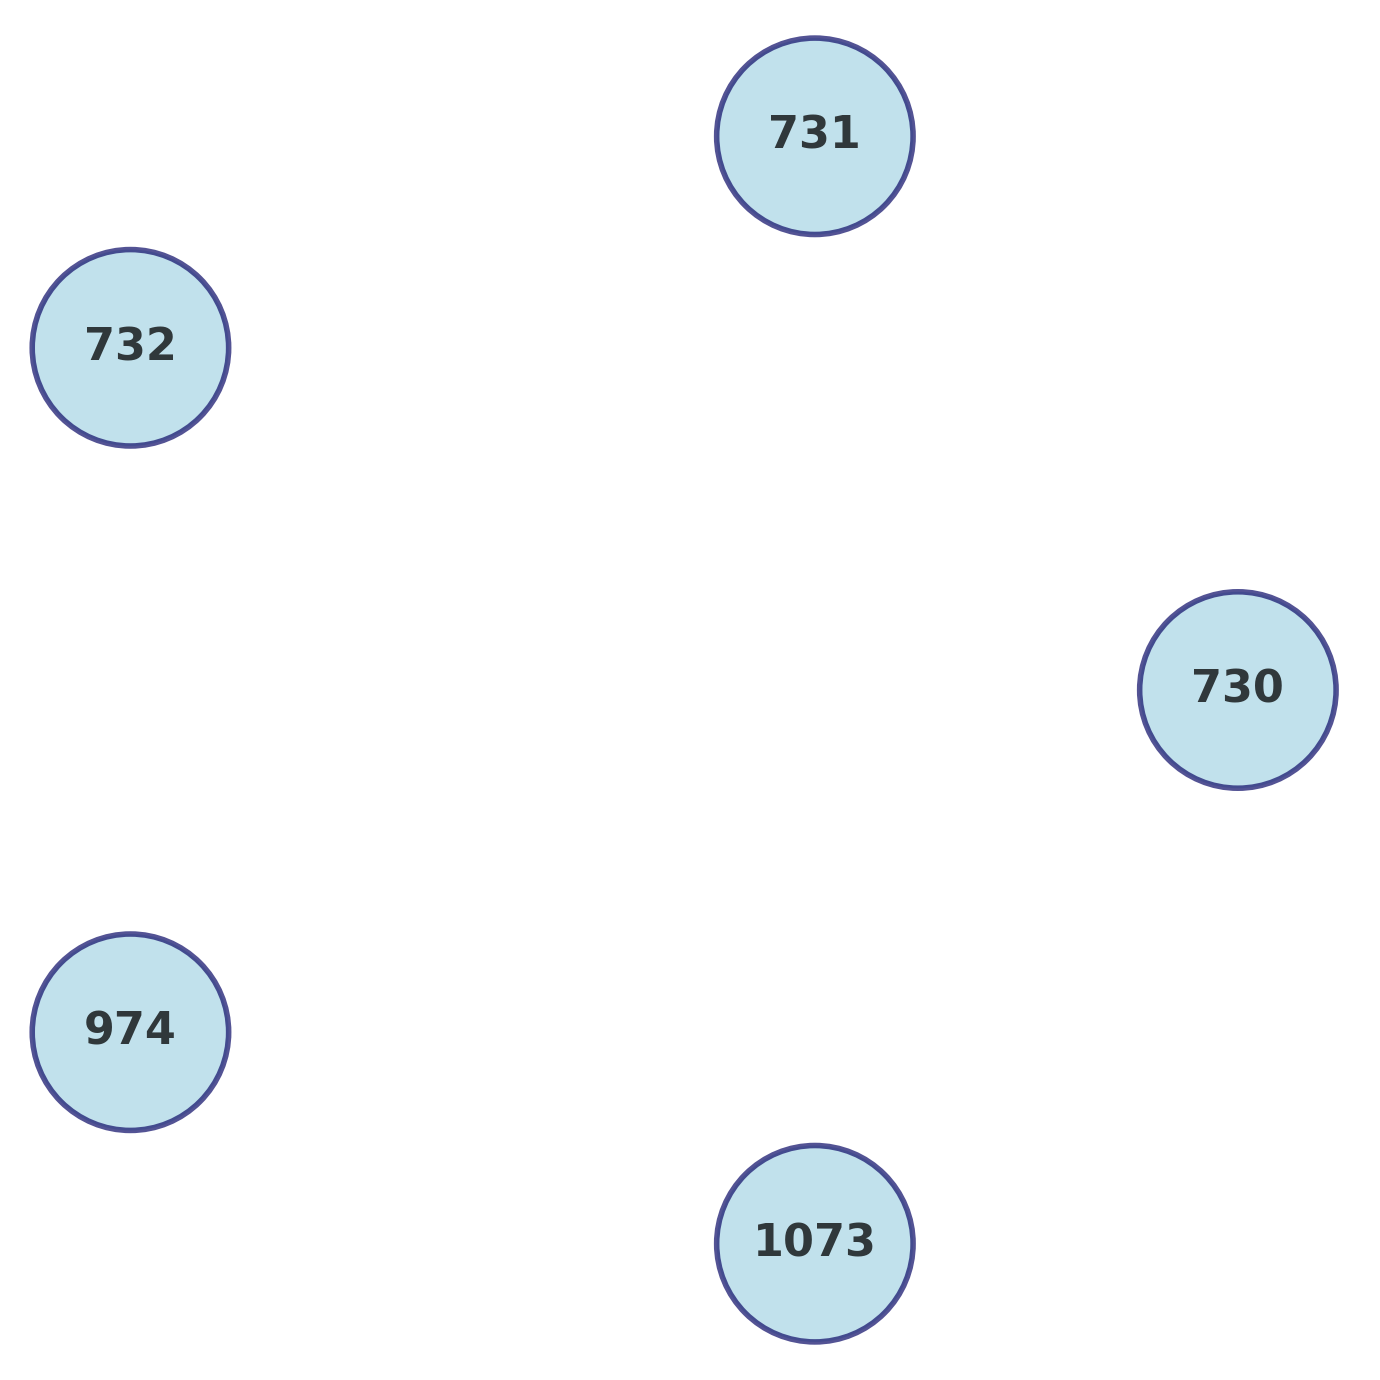

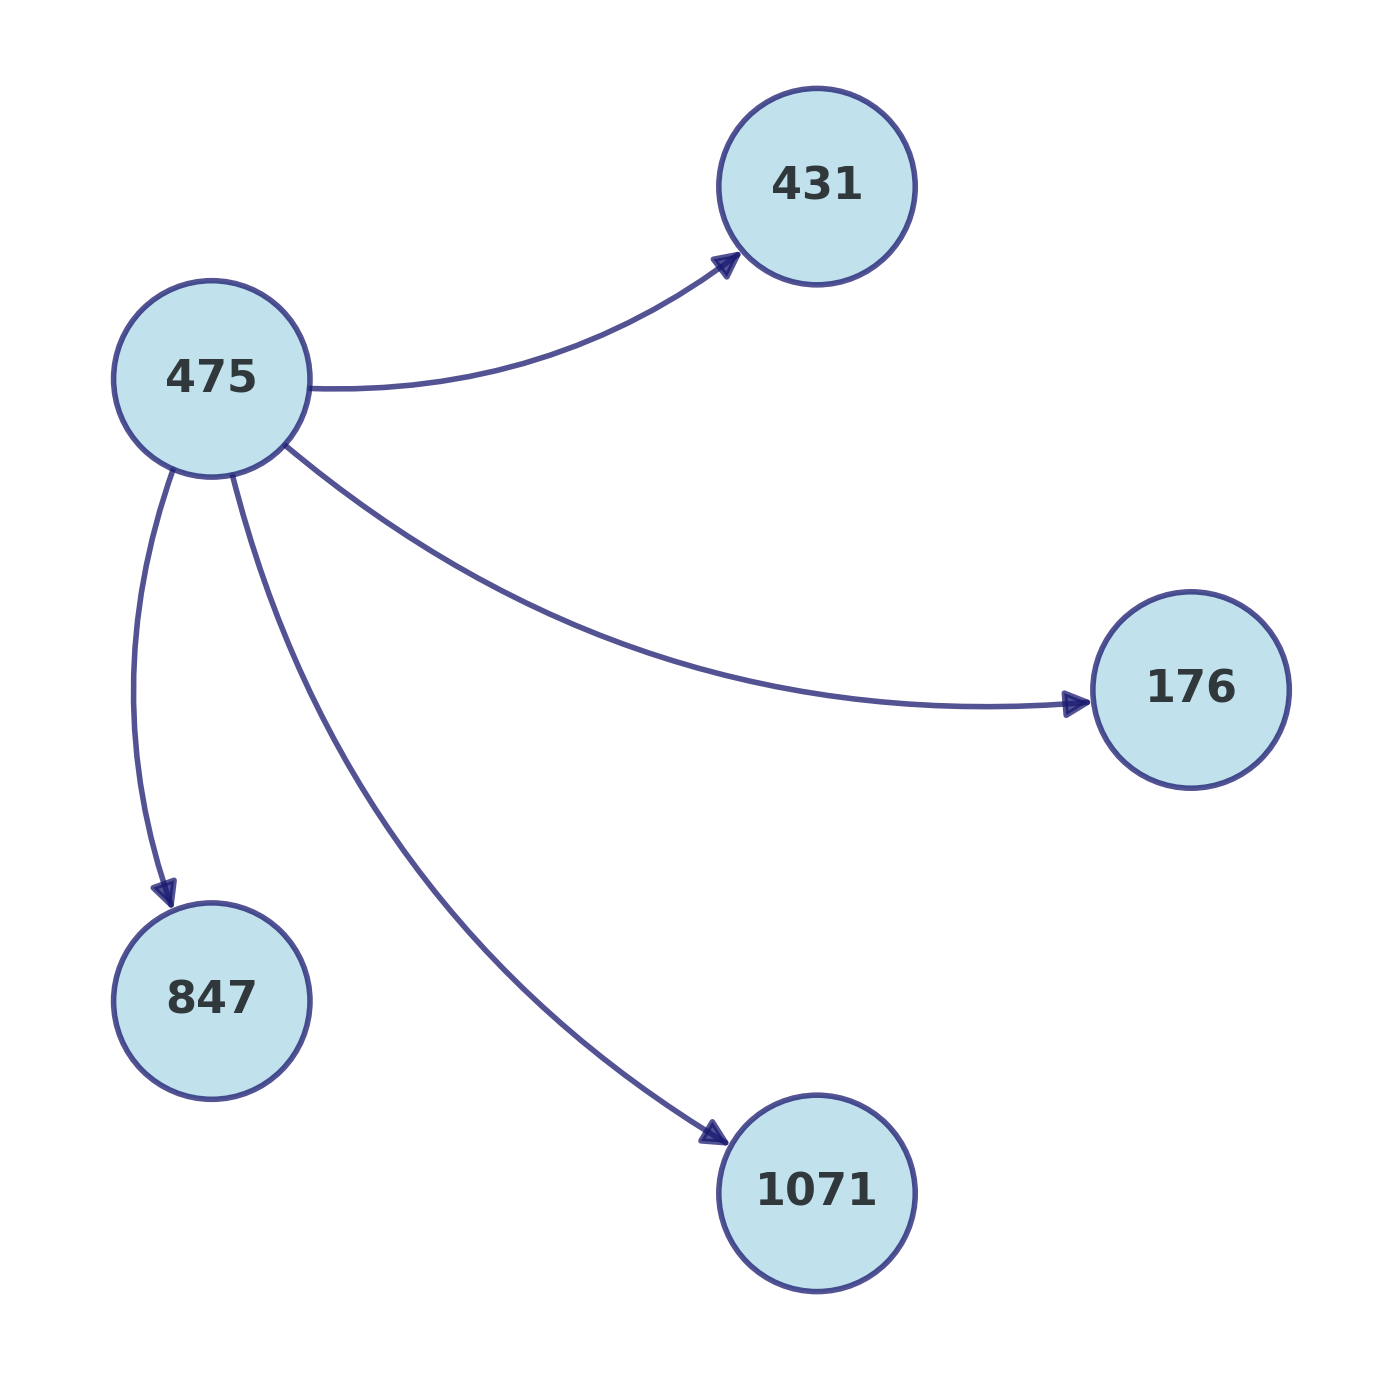

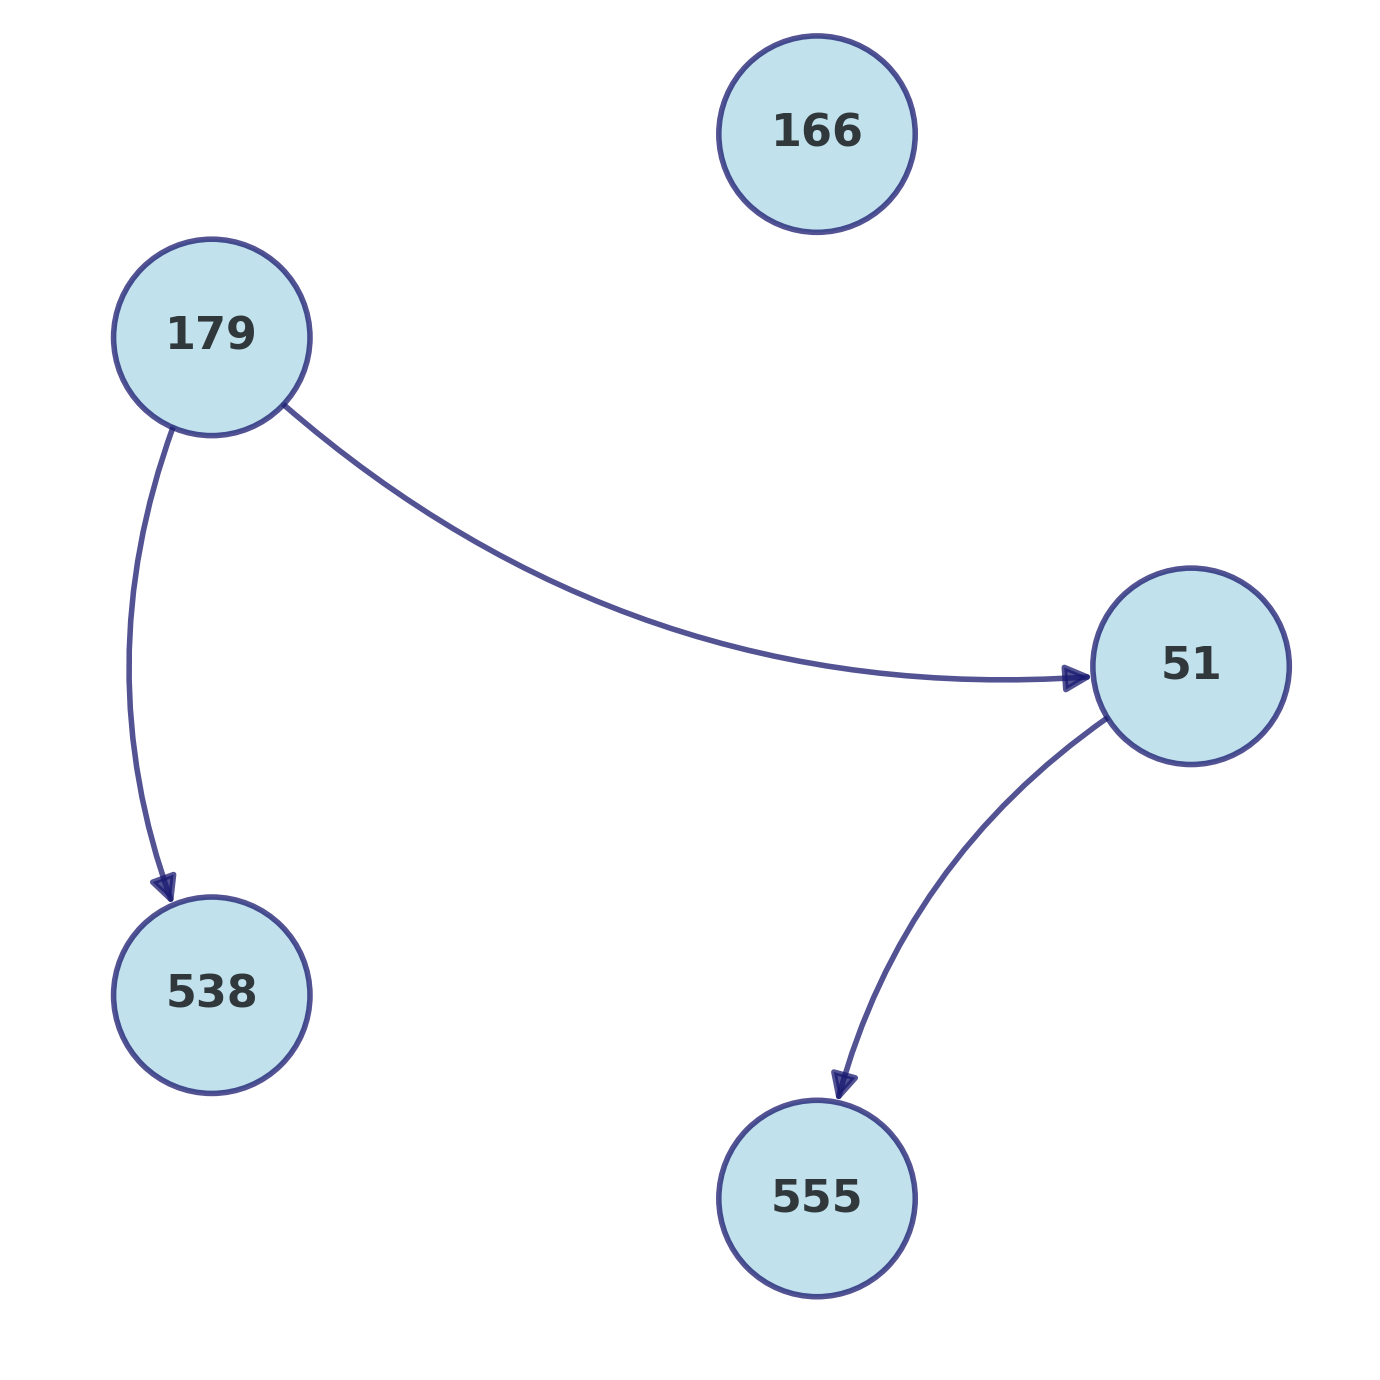

In [97]:
fmax_rivers = []
for river_idx in range(10):

    df, graph = datasets.load_rivernet(river_idx)
    pars.update({f'model_name': model_name + '_' + str(river_idx)})
    print(pars.get('model_name'))
    pars["true_graph"] = graph
    # df.plot(figsize=(9, 4), linewidth=0.66, use_index=True)
    # plt.show()
    # func.corr_heatmap(df)
    causal_matrix, causal_graph, fmax, computation_time = cdmi.causal_graph(df, pars)
    fmax_rivers.append(fmax)

0.4066736048833236


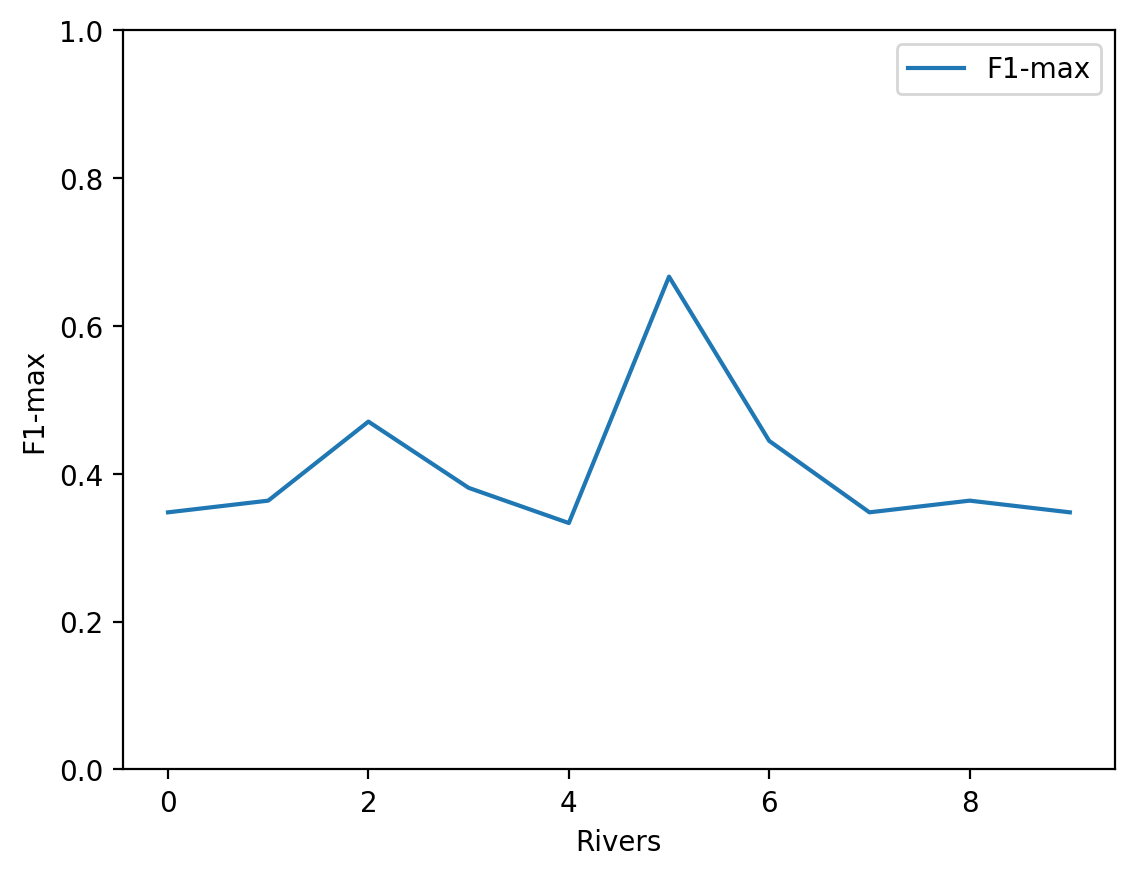

In [105]:
print(np.mean(fmax_rivers))
plt.plot(fmax_rivers, label='F1-max')
plt.ylim(0, 1)
plt.xlabel('Rivers')
plt.ylabel('F1-max')
plt.legend()